In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TD Eclairage Public 1
## Seuil de visibilité d’un objet

**Rappel : modèle d'Adrian**

$$ C_{seuil} = \frac{\Delta L_{seuil}}{L_0} = \frac{2,6}{L_0}\left[\left(\frac{b}{\alpha}\right)+c\right]^2 \times F \times T_{obs} \times AF $$

Avec :
- $L_0$ : Luminance du fond
- $\alpha$ : angle sous-tendu par l'objet observé, **exprimé en minute d'angle**
- $F$ : Facteur de polarité du contraste ($F=1$ pour un contraste positif)
- $Ag$ : Age de l'observateur ($AF=1$ pour un sujet de 23 ans coucou bébou)
- $T_{obs}$ : durée d'observation en seconde (toujours < 2s)

Pour un adulte de 23 à 64 ans :

$$AF = 0.99 + \frac{(Age - 19)}{2160}$$ 

$$T_{obs}=\frac{\frac{\sqrt{g^2 + h^2}}{2.1} + t}{t}$$

Avec g et h :

$$ g = 0,36 - 0,0972 \left[\frac{(log(\alpha)+0,523)^2}{(log(\alpha)+0,523)^2 - 2,513(log(\alpha)+0,523)+2,7895} \right]$$

$$ h = 0,355 - 0,1217 \left[\frac{(log(L_0)+6)^2}{(log(L_0)+6)^2 - 2,513(log(L_0)+6)+52,28} \right]$$

* Si $L_0 > 0,6 cd.m^2$ :

$$ b = log(4,2841 L_0^{0,1556}) + 0,1684 L_0^{0,5867} $$

$$ c = 0,05946 L_0^{0,466} $$

* Si $0,0042 < L_0 < 0,6 cd.m^2$ :

$$ b = 10^{-0,072+0,3372log(L_0)+0,0866(log(L_0))^2} $$

$$ c = 10^{-1,256 + 0,319 log(L_0)}$$

Treshold Increment :

$$ TI=\frac{C" - C'}{C'}$$

**Données de l'obseration** : On considère un observateur agé de $50$ ans qui observe un objet
sous-tendu par un angle de $0.5$ degré sur une luminance de fond de $L_0 = 2cd.m^{-2}$, en contraste positif pendant une durée de $0.2s$.

**Calcul de la visibilité**

0. Implémentation des fonctions pour g,h,b et c.

In [2]:
def fn_g (alpha):
    numerateur = np.square(np.log10(alpha) + 0.523)
    denumerateur = np.square(np.log10(alpha) + 0.523) - 2.513 * (np.log10(alpha) + 0.523) + 2.7895
    g = 0.36 - 0.0972 * numerateur/denumerateur
    return g

def fn_h (Ltotale):
    numerateur = np.square(np.log10(Ltotale) + 6)
    denumerateur = np.square(np.log10(Ltotale) + 6) - 2.513 * (np.log10(Ltotale) + 6) + 52.28
    h = 0.355 - 0.1217 * numerateur/denumerateur
    return h

def fn_b (Ltotale):
    try :
        if (Ltotale > 0.6):
            b = np.log10(4.2841 * np.power(Ltotale, 0.1556)) + 0.1684 * Ltotale**(0.5867)
        elif (Ltotale > 0.0042):
            exp = -0.072 + 0.3372 * np.log10(Ltotale) + 0.0866 * np.square(np.log10(Ltotale))
            b = np.power(10, exp)
        return b
    except :
        print("Exception trown in fn_b, wrong value of Ltotale.")


def fn_c(Ltotale):
    try :
        if (Ltotale > 0.6):
            c = 0.05946 * np.power(Ltotale, 0.466)
        elif (Ltotale > 0.0042):
            exp = -1.256 + 0.319 * np.log10(Ltotale)
            c = np.power(10, exp)
        return c
    except :
        print("Exception trown in fn_c, wrong value of Ltotale.")


1. Calculer le contraste $C_0$ au seuil de visibilité pour cet objet et cet observateur.

In [3]:
def fn_AF (age):
    af = 0.99 + np.square(age - 19) / 2160
    return af

def fn_Tobs (g, h, t):
    tobs = (np.sqrt(g * g + h * h) / 2.1 + t) / t
    return tobs

In [4]:
# Constantes
age = 50
alpha = 30 # min d'angle
t = 0.5
Lzero = 2

def fn_Czero_seuil(age, alpha, t):
    tab_result = []
    for Ltotale in np.linspace(0.5, 10, 50):
        Cseuil = 2.6 / Ltotale * (fn_b(Ltotale) / alpha + fn_c(Ltotale))**2 * fn_Tobs(fn_g(alpha), fn_h(Ltotale), t) * fn_AF(age)
        tab_result.append(Cseuil)
    return tab_result

Czero_seuil = fn_Czero_seuil(age, alpha, t)

In [5]:
plt.plot(np.linspace(0.5, 10, 50), Czero_seuil)
plt.xlabel("Ltotale")
plt.ylabel("Cseuil")
plt.title("contraste C0 au seuil de visibilité")
plt.scatter(2, 2.6 / 2 * (fn_b(Lzero) / alpha + fn_c(Lzero))**2 * fn_Tobs(fn_g(alpha), fn_h(Lzero), t) * fn_AF(age))


2. Visibilité de l’objet. Toujours dans ces mêmes conditions, calculer les contrastes $C_1$ et $C_2$ de deux objets de luminance respective de $2.1$ et $2.05 cd.m^{−2}$ . En comparant à la question précédente, ces objets sont-ils visibles par l’observateur ?

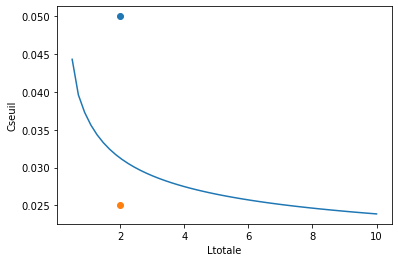

In [6]:
# Constantes
Ltotale = 2
L1 = 2.1
L2 = 2.05 

C1 = (L1 - Ltotale) / Ltotale
C2 = (L2 - Ltotale) / Ltotale
# L - L0 / L0

plt.plot(np.linspace(0.5, 10, 50), Czero_seuil)
plt.xlabel("Ltotale")
plt.ylabel("Cseuil")
plt.scatter(Ltotale, C1)
plt.scatter(Ltotale, C2)
plt.show()

3. Calcul du « contraste détérioré ». Pour cette même luminance de fond $L0$ , calculez la détérioration du contraste $C’$ consécutive à une luminance de voile de $L_v = 0.6 cd.m^{−2}$.

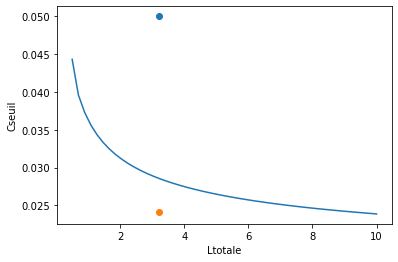

In [9]:
# Constantes
Lvoile = 0.6
Ltotale = Ltotale + Lvoile

Cseuil = 2.6 / Ltotale * (fn_b(Ltotale) / alpha + fn_c(Ltotale))**2 * fn_Tobs(fn_g(alpha), fn_h(Ltotale), t) * fn_AF(age)
Cprim = Cseuil * Ltotale / (Ltotale + Lvoile)

plt.plot(np.linspace(0.5, 10, 50), Czero_seuil)
plt.xlabel("Ltotale")
plt.ylabel("Cseuil")
plt.scatter(Ltotale, C1)
plt.scatter(Ltotale, Cprim)
plt.show()

4. Calcul du TI : Threshold Increment.

— Calculer le contraste seuil $C”$, correspondant à la luminance global $L_0 + L_v$.

— Donnez la valeur de l’incrément TI pour revenir de $C’$ au seuil de visibilité $C”$.

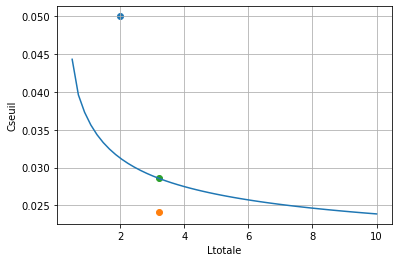

In [10]:
Cprimprim = 2.6 / Ltotale * (fn_b(Ltotale) / alpha + fn_c(Ltotale))**2 * fn_Tobs(fn_g(alpha), fn_h(Ltotale), t) * fn_AF(age)

plt.plot(np.linspace(0.5, 10, 50), Czero_seuil)
plt.grid()
plt.xlabel("Ltotale")
plt.ylabel("Cseuil")
plt.scatter(Lzero, C1)
plt.scatter(Ltotale, Cprim)
plt.scatter(Ltotale, Cprimprim)
plt.show()

In [11]:
TI = (Cprimprim - Cprim) / Cprim
print(TI)


0.1874999999999999


$\begin{array}{l l l}{f(x)}&{=}&{M\cdot\frac{1}{1+e^{a+b x}}\cdot\frac{1}{1+e^{c}}}\end{array}$